In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.models import Sequential  # container 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,Activation,LeakyReLU
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax
from tensorflow.keras.activations import sigmoid,relu,softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augmentation 

In [3]:
path = "E:\\data"

In [4]:
path

'E:\\data'

In [5]:
train_data_path = path + '\\Training'
test_data_path = path + '\\Testing'

In [6]:
train_data_path

'E:\\data\\Training'

In [7]:
test_data_path

'E:\\data\\Testing'

In [8]:
from glob import glob
glob('E:\\data\\Training\\*')

['E:\\data\\Training\\glioma_tumor',
 'E:\\data\\Training\\meningioma_tumor',
 'E:\\data\\Training\\no_tumor',
 'E:\\data\\Training\\pituitary_tumor']

In [9]:
from glob import glob
glob('E:\\data\\Testing\*')

['E:\\data\\Testing\\glioma_tumor',
 'E:\\data\\Testing\\meningioma_tumor',
 'E:\\data\\Testing\\no_tumor',
 'E:\\data\\Testing\\pituitary_tumor']

In [10]:
img_width , img_height = 150,150

In [11]:
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [12]:
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               horizontal_flip=True,
                               zoom_range=0.2)
                               
                               
test_gen = ImageDataGenerator(rescale=1./255)

In [13]:
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               horizontal_flip=True,
                               zoom_range=0.2)
                               
                               
test_gen = ImageDataGenerator(rescale=1./255)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [14]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
epochs1 = 10   # categorical

In [21]:
from PIL import Image
import PIL.ImageOps  
import requests
import io

In [23]:
model.fit(train,epochs=epochs1,validation_data=test)

Epoch 1/10
90/90 [==============================] - 76s 844ms/step - loss: 0.7745 - accuracy: 0.6631 - val_loss: 1.7101 - val_accuracy: 0.4188
Epoch 2/10
90/90 [==============================] - 58s 645ms/step - loss: 0.6733 - accuracy: 0.7118 - val_loss: 1.8280 - val_accuracy: 0.4213
Epoch 3/10
90/90 [==============================] - 58s 646ms/step - loss: 0.6157 - accuracy: 0.7443 - val_loss: 1.5215 - val_accuracy: 0.4873
Epoch 4/10
90/90 [==============================] - 59s 650ms/step - loss: 0.5741 - accuracy: 0.7645 - val_loss: 1.6984 - val_accuracy: 0.4772
Epoch 5/10
90/90 [==============================] - 59s 650ms/step - loss: 0.5475 - accuracy: 0.7774 - val_loss: 1.7885 - val_accuracy: 0.4949
Epoch 6/10
90/90 [==============================] - 59s 652ms/step - loss: 0.4869 - accuracy: 0.8038 - val_loss: 1.8516 - val_accuracy: 0.5152
Epoch 7/10
90/90 [==============================] - 60s 666ms/step - loss: 0.4809 - accuracy: 0.7955 - val_loss: 1.8342 - val_accuracy: 0.4797

In [25]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
train_loss = model.history.history['loss']
train_loss

[0.7745172381401062,
 0.6732529997825623,
 0.6156545281410217,
 0.5741163492202759,
 0.5475116968154907,
 0.48692241311073303,
 0.48093628883361816,
 0.4858977198600769,
 0.4416152536869049,
 0.40238550305366516]

In [27]:
test_loss = model.history.history['val_loss']
test_loss

[1.710120439529419,
 1.828026533126831,
 1.5214989185333252,
 1.6983782052993774,
 1.7884995937347412,
 1.8516393899917603,
 1.8341649770736694,
 2.1593286991119385,
 1.6833440065383911,
 2.1519341468811035]

In [28]:
train_acc = model.history.history['accuracy']
train_acc

[0.6630662083625793,
 0.7118467092514038,
 0.7442508935928345,
 0.7644599080085754,
 0.7773519158363342,
 0.8038327693939209,
 0.7954703569412231,
 0.806620180606842,
 0.8240417838096619,
 0.8358885049819946]

In [29]:
test_acc = model.history.history['val_accuracy']
test_acc

[0.41878172755241394,
 0.42131978273391724,
 0.48730963468551636,
 0.4771573543548584,
 0.494923859834671,
 0.5152284502983093,
 0.4796954393386841,
 0.5177664756774902,
 0.5837563276290894,
 0.5355330109596252]

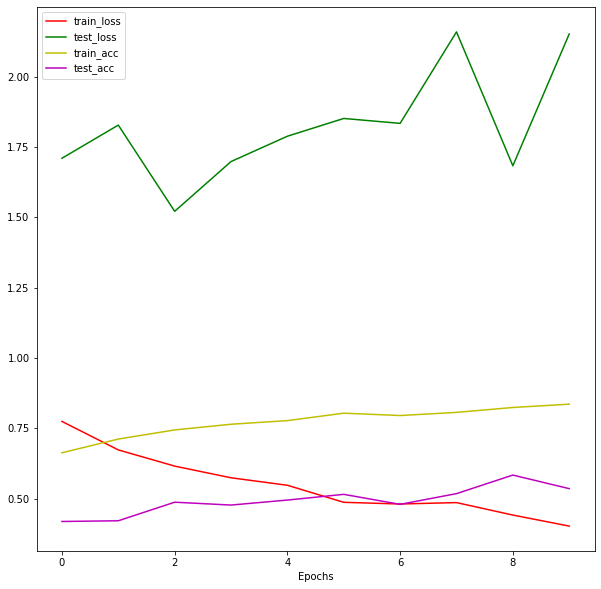

In [31]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(epochs1),train_loss,color='r',label='train_loss')
plt.plot(np.arange(epochs1),test_loss,color='g',label='test_loss')
plt.plot(np.arange(epochs1),train_acc,color='y',label='train_acc')
plt.plot(np.arange(epochs1),test_acc,color='m',label='test_acc')
plt.legend()
plt.xlabel('Epochs')
plt.show()

In [53]:
labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [71]:
from tensorflow.keras.preprocessing import image

In [63]:
import warnings
warnings.filterwarnings('ignore')

In all labels the test point =  [[0. 0. 1. 0.]]
[2]
no_tumor


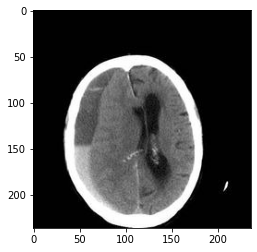

In [85]:
g = 'E:\\data\\Testing\\no_tumor\\image(1).jpg'
img_read = image.load_img(g , target_size=(img_height,img_width))
img_read = image.img_to_array(img_read)
#print(img_read)
a = np.expand_dims(img_read,axis=0)
#print(a)
prob = model.predict_proba(a)
print("In all labels the test point = ",prob)
a = model.predict_classes(a)
print(a)
if a[0]==0:
    prediction='glioma_tumor'
elif a[0]==1:
    prediction='meningioma_tumor'
elif a[0]==2:
    prediction='no_tumor'
else:
    prediction ='pituitary_tumor'
print(prediction)
img = plt.imread(g)
plt.imshow(img)

In all labels the test point =  [[0. 0. 1. 0.]]
[2]
no_tumor


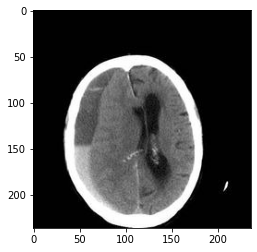

In [84]:
g = 'E:\\data\\Testing\\no_tumor\\image(1).jpg'
img_read = image.load_img(g , target_size=(img_height,img_width))
img_read = image.img_to_array(img_read)
#print(img_read)
a = np.expand_dims(img_read,axis=0)
#print(a)
prob = model.predict_proba(a)
print("In all labels the test point = ",prob)
a = model.predict_classes(a)
print(a)
if a[0]==0:
    prediction='glioma_tumor'
elif a[0]==1:
    prediction='meningioma_tumor'
elif a[0]==2:
    prediction='no_tumor'
else:
    prediction ='pituitary_tumor'
print(prediction)
img = plt.imread(g)
plt.imshow(img)

In [72]:
def fun(path):
    image_pred = image.load_img(path,target_size=(img_height,img_width))
    image_pred = image.img_to_array(image_pred)
    a = np.expand_dims(image_pred,axis=0)
    result = model.predict_classes(a)
    prob = model.predict_proba(a)
    print('prediction class',result)
    print('probability:{}'.format(prob[0]))
    if result[0]==0:
        prediction='glioma_tumor'
    elif result[0]==1:
        prediction='meningioma_tumor'
    elif result[0]==2:
        prediction='no_tumor'
    else:
        prediction = 'pituitary_tumor'
    
    
    print('predicition_class:',prediction)

In [78]:
fun('E:\\data\\Testing\\no_tumor\\image(1).jpg')

prediction class [2]
probability:[0. 0. 1. 0.]
predicition_class: no_tumor


In [83]:
fun('E:/data/Testing/pituitary_tumor/image(1).jpg')

prediction class [1]
probability:[0. 1. 0. 0.]
predicition_class: meningioma_tumor


In [81]:
fun('E:/data/Testing/meningioma_tumor/image(2).jpg')

prediction class [1]
probability:[0.0000000e+00 1.0000000e+00 2.8403326e-25 0.0000000e+00]
predicition_class: meningioma_tumor
